# Calculate extreme indices

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR
# import obs_functions as funcO

In [3]:
# define path where obs data is store
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [4]:
# open daily T data from 5 stations 
daily_T = xr.open_dataset(f'{path}Daily_T_Aus_5S.nc')
daily_T

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

In [102]:
dataset = daily_T.Tmin
dataset

<xarray.DataArray 'Tmin' (station: 5, time: 15705)>
array([[10.7, 13.1, 13.9, ..., 14.6, 15. , 18.2],
       [11.7, 11.1, 12.2, ..., 13.6, 15.4, 14.2],
       [ 9.7, 12.6, 15.1, ..., 18.4, 16.6,  nan],
       [11.5, 13.3,  8.9, ..., 13.3, 14.2, 15.5],
       [19.8, 19.5, 17. , ..., 20. , 19.4, 21.1]])
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'

In [111]:
frost_test = dataset.where(dataset<0).groupby('time.month').count(dim='time')
frost_test

<xarray.DataArray 'Tmin' (station: 5, month: 12)>
array([[  0,   0,   0,   0,   0,   1,   6,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0],
       [  1,   0,   3,  42, 292, 489, 657, 501, 240,  84,   3,   0],
       [  0,   0,   0,   0,   4,  15,  40,  19,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])
Coordinates:
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

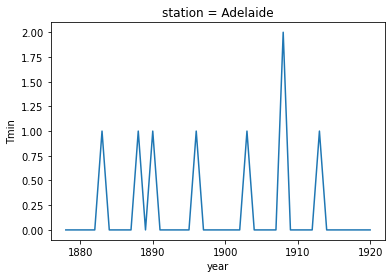

In [106]:
frost_test.sel(station='Adelaide').plot()

In [11]:
def frostdays(ds_Tmin):
    # annual count of number of days Tmin (ds) is less than 0C
    count_FD = ds_Tmin.groupby('time.month').where(ds_Tmin<0).count()
    return count_FD

In [19]:
def summerdays(ds_Tmax):
    # annual count of number of days when Tmax>25C
    count_SU = len(ds_Tmax.where(ds_Tmax>25, drop=True))
    return count_SU

In [20]:
def icingdays(ds_Tmax):
    # annual count of number of days Tmax (ds) is less than 0C
    count_ID = len(ds_Tmax.where(ds_Tmax<0, drop=True))
    return count_ID

In [21]:
def tropicalnights(ds_Tmin):
    # annual count of number of days Tmin (ds) is greater than 20C
    count_TR = len(ds_Tmin.where(ds_Tmin>20, drop=True))
    return count_TR

### need to code below cell
should output 12 values for each year (ie one for each month) 

In [24]:
def maxmax_month_T(ds_Tmax):
    # maximum daily maximum temperature each month 
    #group data by month - find max each month
    ds_month = ds_Tmax.groupby('M')
    TXx = max(ds_month)
    return TXx

In [25]:
def maxmin_month_T(ds_Tmin):
    # maximum daily minimum temperature each month 
    #group data by month - find max each month
    ds_month = ds_Tmin.groupby('M')
    TNx = max(ds_month)
    return TNx

In [26]:
def minmin_month_T(ds_Tmin):
    # minimum daily minimum temperature each month 
    #group data by month - find min each month
    ds_month = ds_Tmin.groupby('M')
    TNn = min(ds_month)
    return TNn

In [28]:
def minmax_month_T(ds_Tmax):
    # minimum daily maximum temperature each month 
    #group data by month - find min each month
    ds_month = ds_Tmax.groupby('M')
    TXn = min(ds_month)
    return TXn

In [ ]:
?????
def daily_range(ds_Tmax, ds_Tmin):
    

In [29]:
def extreme_range(TXx, TNn):
    ETR = TXx - TNn
    return ETR

In [8]:
data_A = daily_T.sel(station = 'Adelaide')

In [10]:
data_A.Tmin.count(data_A.Tmin.where(data_A.Tmin<0))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
data_A.Tmin.where(data_A.Tmin<0, drop=True).count(dim='time').data

array(8)

In [13]:
len(data_A.Tmin.where(data_A.Tmin<0, drop=True))

8